##### Imports 

In [1]:
import pandas as pd
import csv
import logging
from functions_py.mephys_funcs import read_file, merge_dataframes, filter_date, drop_cols, drop_nans, \
create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)

##### Pandas Display Settings

In [2]:
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Lists/Paths

In [3]:
fields_jem = ["date", "organism_name", "name", "container", "rigOperator",
              "status", "roi_major", "roi_minor",
              "extraction.postPatch", "extraction.endPipetteR"]
fields_ephys = ["b'name'", "b'patched_cell_container'", "b'vrest'", "b'ri'", "b'sag'", 
                "b'tau'", "b'upstroke_downstroke_ratio_long_square'", 
                "b'latency'", "b'f_i_curve_slope'"]
fields_shiny = ["cell_name", "sample_id", "cluster_label", "broad_class_label",
                "subclass_label", "cell_specimen_project"]


path_jem = "Z:/Patch-Seq/compiled-jem-data/jem_metadata.csv"
#path_jem = "C:/Users/ramr/Documents/Github/analysis_projects/csv/jem_metadata.csv"
path_ephys = "C:/Users/ramr/Documents/Github/analysis_projects/csv/mephys_features.csv"
path_shiny = "//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv"


drop_cols_list = ["b'name'", "b'patched_cell_container'", "cell_name", "sample_id"]
drop_nans_list = ["date", "name", "rigOperator"]

r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]

##### Main

In [4]:
def main():
    global merge_all, merge_all_glu, merge_all_gab, jem, shiny
    jem = read_file(path_jem, fields_jem)
    ephys = read_file(path_ephys, fields_ephys)
    shiny = read_file(path_shiny, fields_shiny)
    merge_je = merge_dataframes(jem, ephys, "name", "b'name'")
    merge_all = merge_dataframes(merge_je, shiny, "name", "cell_name")
    merge_all = filter_date(merge_all, "date")
    merge_all = drop_cols(merge_all, drop_cols_list)
    merge_all = drop_nans(merge_all, drop_nans_list)
    merge_all = create_container_df(merge_all, "container")
    merge_all = create_cond_df(merge_all, "rigOperator", r_users)
    merge_all_glu = create_cond_df(merge_all, "broad_class_label", ["Glutamatergic"])
    merge_all_gab = create_cond_df(merge_all, "broad_class_label", ["GABAergic"])

In [5]:
if __name__ == "__main__":
    main()

INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe
INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe
INFO:functions_py.mephys_funcs:Read file in as a pandas dataframe
INFO:functions_py.mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:functions_py.mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:functions_py.mephys_funcs:Sorted date to only display 2020 data
INFO:functions_py.mephys_funcs:Dropped columns: ["b'name'", "b'patched_cell_container'", 'cell_name', 'sample_id']
INFO:functions_py.mephys_funcs:Dropped NaNs from these columns: ['date', 'name', 'rigOperator']
INFO:functions_py.mephys_funcs:Created a container_label column to show(ex.'PA')
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


##### Mouse Region Dataframes

In [6]:
rsp = create_cond_df(merge_all, "roi_major", ["RSPd", "RSPv"])
ssp = create_cond_df(merge_all, "roi_major", ["SSp"])
orb = create_cond_df(merge_all, "roi_major", ["ORB"])
ctxsp = create_cond_df(merge_all, "roi_major", ["CTXsp"])
mo = create_cond_df(merge_all, "roi_major", ["MOp", "MOs"])
visp = create_cond_df(merge_all, "roi_major", ["VISp"])

INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


##### Gluatamatergic Mouse Region Dataframes

In [7]:
rsp_glu = create_cond_df(merge_all_glu, "roi_major", ["RSPd", "RSPv"])
ssp_glu = create_cond_df(merge_all_glu, "roi_major", ["SSp"])
orb_glu = create_cond_df(merge_all_glu, "roi_major", ["ORB"])
ctxsp_glu = create_cond_df(merge_all_glu, "roi_major", ["CTXsp"])
mo_glu = create_cond_df(merge_all_glu, "roi_major", ["MOp", "MOs"])
visp_glu = create_cond_df(merge_all_glu, "roi_major", ["VISp"])

INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


##### GABAergic Mouse Region Dataframes

In [8]:
rsp_gab = create_cond_df(merge_all_gab, "roi_major", ["RSPd", "RSPv"])
ssp_gab = create_cond_df(merge_all_gab, "roi_major", ["SSp"])
orb_gab = create_cond_df(merge_all_gab, "roi_major", ["ORB"])
ctxsp_gab = create_cond_df(merge_all_gab, "roi_major", ["CTXsp"])
mo_gab = create_cond_df(merge_all_gab, "roi_major", ["MOp", "MOs"])
visp_gab = create_cond_df(merge_all_gab, "roi_major", ["VISp"])

INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values
INFO:functions_py.mephys_funcs:Created a conditional dataframe based on a list of values


##### Count Dictionary

In [9]:
region_dict = {"Overall Mouse Total count": merge_all.name.count(),
               "RSP Total": rsp.name.count(),
               "SSp Total": ssp.name.count(),
               "ORB Total": orb.name.count(),
               "CTXsp Total": ctxsp.name.count(),
               "MO Total": mo.name.count(),
               "VISp Total": visp.name.count()}

glu_dict = {"Glutamatergic Mouse Total count": merge_all_glu.name.count(),
            "RSP": rsp_glu.name.count(),
            "SSp": ssp_glu.name.count(),
            "ORB": orb_glu.name.count(),
            "CTXsp": ctxsp_glu.name.count(),
            "MO": mo_glu.name.count(),
            "VISp": visp_glu.name.count()}

gab_dict = {"GABAergic Mouse Total count": merge_all_gab.name.count(),
            "RSP": rsp_gab.name.count(),
            "SSp": ssp_gab.name.count(),
            "ORB": orb_gab.name.count(),
            "CTXsp": ctxsp_gab.name.count(),
            "MO": mo_gab.name.count(),
            "VISp": visp_gab.name.count()}

In [10]:
region_dict

{'Overall Mouse Total count': 194,
 'RSP Total': 84,
 'SSp Total': 26,
 'ORB Total': 29,
 'CTXsp Total': 11,
 'MO Total': 26,
 'VISp Total': 18}

In [11]:
glu_dict

{'Glutamatergic Mouse Total count': 140,
 'RSP': 57,
 'SSp': 18,
 'ORB': 17,
 'CTXsp': 7,
 'MO': 25,
 'VISp': 16}

In [12]:
gab_dict

{'GABAergic Mouse Total count': 54,
 'RSP': 27,
 'SSp': 8,
 'ORB': 12,
 'CTXsp': 4,
 'MO': 1,
 'VISp': 2}

##### Paths

In [13]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
excel_path = "C:/Users/ramr/Documents/Github/analysis_projects/excel/"

##### Writing to csv_file

In [14]:
#jem.to_csv(csv_path + "jem.csv")
#jem_2020.to_csv(csv_path + "jem_2020.csv")

##### Writing to excel_file

In [15]:
writer = pd.ExcelWriter(excel_path + "new_region.xlsx")
merge_all.to_excel(writer, "All", freeze_panes=(1,0))
rsp.to_excel(writer, "RSP", freeze_panes=(1,0))
ssp.to_excel(writer, "SSP", freeze_panes=(1,0))
orb.to_excel(writer, "ORB", freeze_panes=(1,0))
ctxsp.to_excel(writer, "CTXsp", freeze_panes=(1,0))
mo.to_excel(writer, "MO", freeze_panes=(1,0))
visp.to_excel(writer, "VISp", freeze_panes=(1,0))
writer.save()

##### RSP Plots

In [16]:
rsp_glu.replace({"roi_major": {"RSPd": "RSP", "RSPv": "RSP"}}, inplace=True)

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [17]:
rsp_visp_glu = pd.concat([rsp_glu, visp_glu])

In [18]:
def box_plt(col_y, jpg_title, plt_title, df=rsp_visp_glu):
    """Creates a box plot using seaborn and compares the ephys features between
    two mouse regions while displaying the t-types.
    Args:
        col_y(string): y-axis column
        jpg_title(string): title of the jpeg file
        plt_tile(string): title of the plot
        df: a pandas dataframe
    Returns: None
    """
    colors={"RSP": "#a1d99b", "VISp": "#9ecae1"}

    fig_dims = (12, 8)
    f, axes = plt.subplots(figsize=fig_dims)

    ax = sns.boxplot(x="subclass_label",
                     y=col_y,
                     hue="roi_major",
                     data=df,
                     order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                     hue_order = ["RSP", "VISp"],
                     palette=colors,
                     saturation=1,
                     width=0.8,
                     linewidth=1,
                     showfliers=False,)

    ax = sns.stripplot(x="subclass_label",
                       y=col_y,
                       hue="roi_major",
                       data=df,
                       order = ["L2/3 IT", "L4", "L5 IT", "L5 PT", "L6 IT", "L6b", "NP"],
                       hue_order = ["RSP", "VISp"],
                       jitter=False,
                       size=4.5,
                       color="0.2",
                       split=True)
    
    #sns.despine(trim=True)
    ax.legend_.remove()
    ax.set(xlabel="T-types", ylabel=plt_title)
    #ax.invert_yaxis()
    #ax.set(ylim=(-85, -55))
    plt.savefig("box_plt_" + jpg_title + ".jpeg", bbox_inches="tight")

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1187: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge

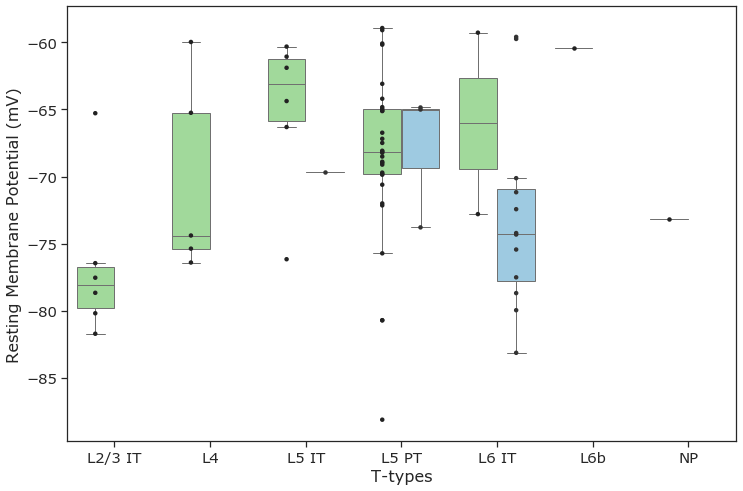

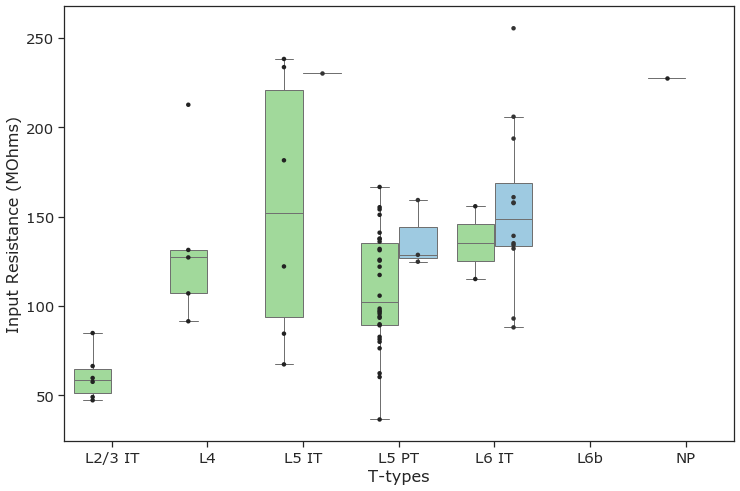

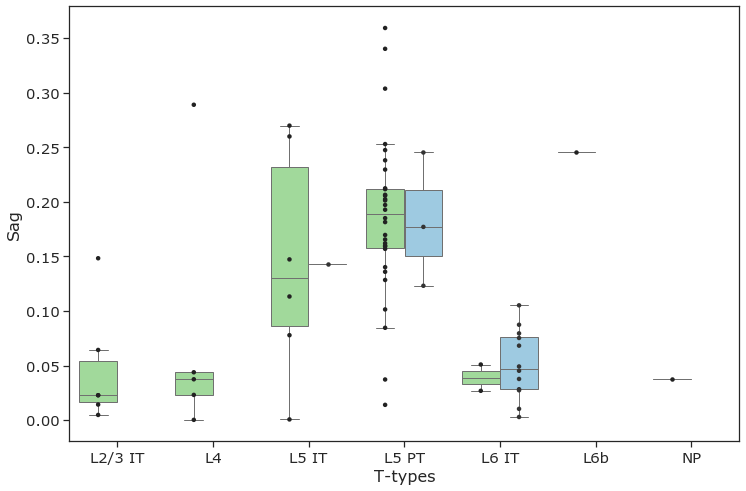

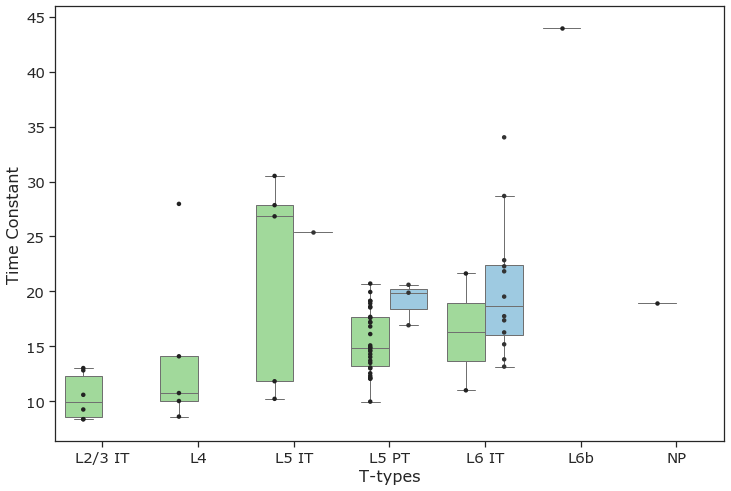

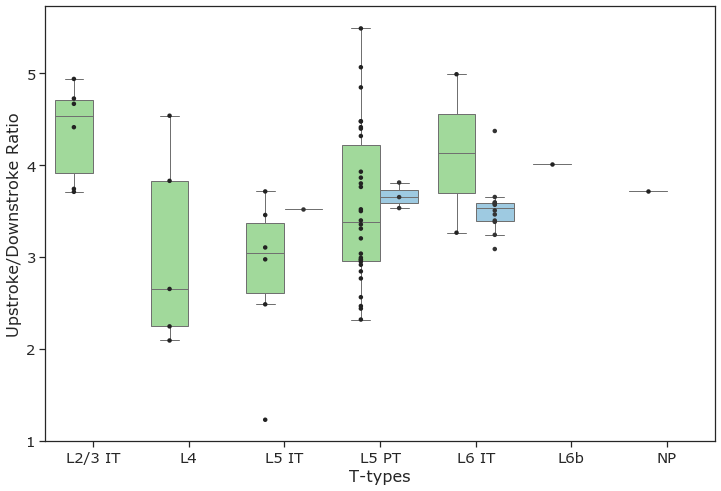

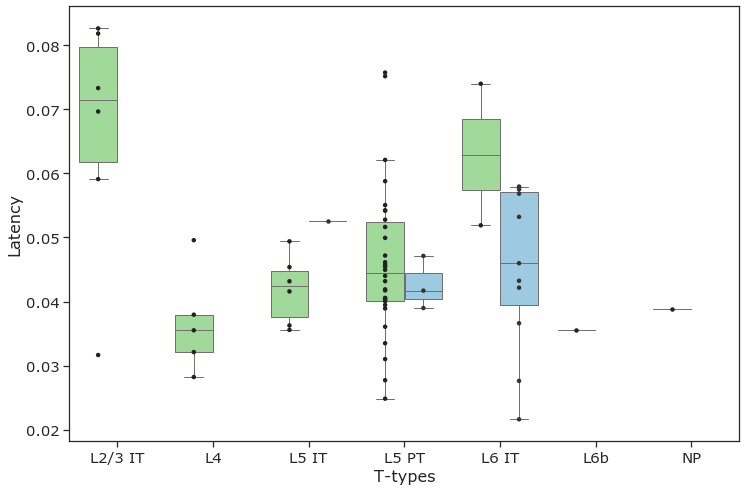

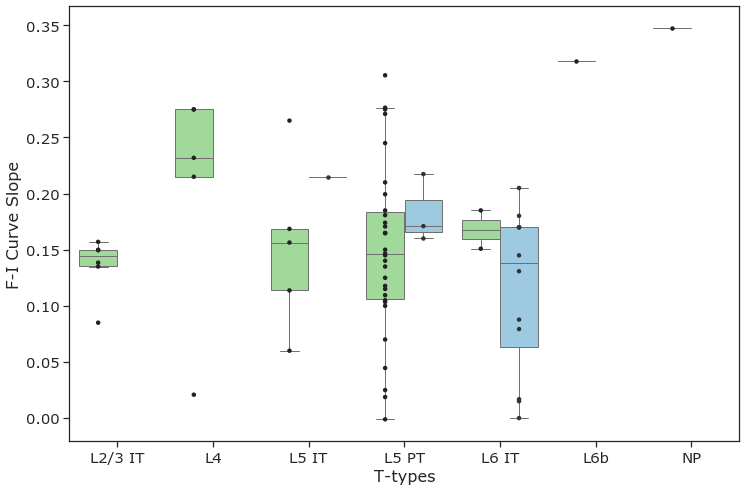

In [19]:
box_plt("b'vrest'", "rmp", "Resting Membrane Potential (mV)", rsp_visp_glu)
box_plt("b'ri'", "ri", "Input Resistance (MOhms)",
        rsp_visp_glu[rsp_visp_glu["b'ri'"] < 300]) #Outlier at 357.5
box_plt("b'sag'", "sag", "Sag", rsp_visp_glu)
box_plt("b'tau'", "tau", "Time Constant",
        rsp_visp_glu[rsp_visp_glu["b'tau'"] < 100]) #Outlier at 100.423
box_plt("b'upstroke_downstroke_ratio_long_square'", "upd", "Upstroke/Downstroke Ratio",
        rsp_visp_glu)#Outlier at 5.49028
box_plt("b'latency'", "lat", "Latency",
        rsp_visp_glu[rsp_visp_glu["b'latency'"] < 0.10]) #Outlier at 0.13772
box_plt("b'f_i_curve_slope'", "fi", "F-I Curve Slope",
        rsp_visp_glu[rsp_visp_glu["b'f_i_curve_slope'"] < 0.5]) #Outlier at 2.53971

##### All Plots

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWar

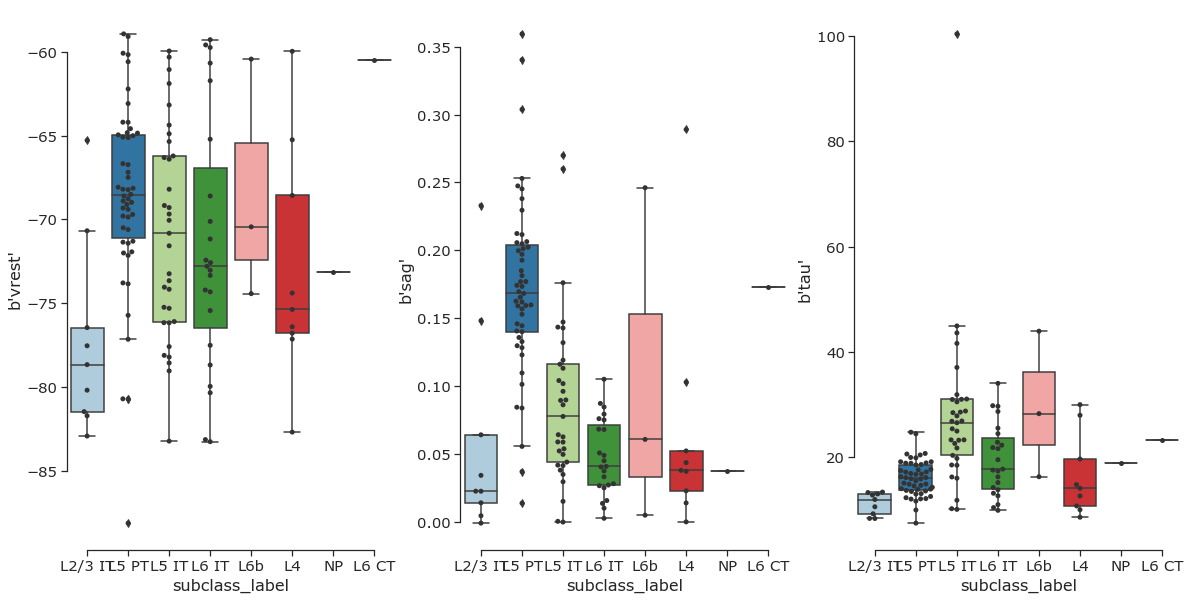

In [20]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=merge_all_glu, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=merge_all_glu, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=merge_all_glu, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=merge_all_glu, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=merge_all_glu, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=merge_all_glu, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

###### Misc


def date_return(df):
    df = df.reset_index()
    start_date = df["date"].iloc[0][0:10]
    end_date = df["date"].iloc[-1][0:10]
    df = df.set_index(["date"])
    logger.info("Created date")
    return df, start_date, end_date



def print_counts():
    """Prints counts of dataframes"""
    #print(f"Date Range: {start_date} to {end_date}")
    print(f"Overall Total count: {jem_2020.container.count()}")
    print()
    print(f"Mouse Total count: {mjem_2020.organism_name.count()}")
    print(f"-RSPd count: {rspd.organism_name.count()}")
    print(f"-RSPv count: {rspv.organism_name.count()}")
    print(f"-SSp count: {ssp.organism_name.count()}")
    print(f"-ORB count: {orb.organism_name.count()}")
    print(f"-CTXsp count: {ctxsp.organism_name.count()}")
    print(f"-MOp count: {mop.organism_name.count()}")
    print(f"-MOs count: {mos.organism_name.count()}")
    print(f"-HY count: {hy.organism_name.count()}")
    print(f"-HIP count: {hip.organism_name.count()}")
    print(f"-VISP count: {visp.organism_name.count()}")
    print()
    print(f"Human Total count: {hjem_2020.organism_name.count()}")
    print(f"-Human Acute count: {hajem_2020.organism_name.count()}")
    print(f"-Human Culture count: {hcjem_2020.organism_name.count()}")

def main():
    jem_2020 = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    jem_2020 = choice()
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    #jem_2020 = date_return(jem_2020)
    #print(start_date)

    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    hjem_2020 = create_cond_df(jem_2020, "organism_name", "Human")
    hajem_2020 = hjem_2020[hjem_2020["p_container"] != "PCS4"]
    hcjem_2020 = create_cond_df(hjem_2020, "p_container", "PCS4")

    mjem_2020 = create_region_col(mjem_2020)
    rspd = create_cond_df(mjem_2020, "roi_major", "RSPd")
    rspv = create_cond_df(mjem_2020, "roi_major", "RSPv")
    ssp = create_cond_df(mjem_2020, "roi_major", "SSp")
    orb = create_cond_df(mjem_2020, "roi_major", "ORB")
    ctxsp = create_cond_df(mjem_2020, "roi_major", "CTXsp")
    mop = create_cond_df(mjem_2020, "roi_major", "MOp")
    mos = create_cond_df(mjem_2020, "roi_major", "MOs")
    hy = create_cond_df(mjem_2020, "roi_major", "HY")
    hip = create_cond_df(mjem_2020, "roi_major", "HIP")
    visp = create_cond_df(mjem_2020, "roi_major", "VISP")
    logger.info("Created region pandas dataframes")
    print_counts()



def create_region_col(df):
    """"""
    df["new_region"] = "default_value"
    LOGGER.info("Created a new column(new_region) with default_value")
    
    c_region = ["RSPd", "RSPv", "SSp"] 
    s_region = ["MOs", "MOp", "ORB", "CTXsp"]
    o_region = ["HY", "HIP"]
    v_region = ["VISp"]
    
    df["new_region"][df.roi_major.str.contains("|".join(c_region))] = "coronal_region"
    df["new_region"][df.roi_major.str.contains("|".join(s_region))] = "sagittal_region"
    df["new_region"][df.roi_major.str.contains("|".join(o_region))] = "other_region"
    df["new_region"][df.roi_major.str.contains("|".join(v_region))] = "v1_region"
    LOGGER.info("Filled in new_region column with region labels")
    return df


def choice():
    """"""
    r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]
    r_user = ["ramr"]
    
    global entry

    print("These are all user options: kristenh, lindsayn, ramr, katherineb, jessicat")
    entry = input("Enter single user name or all users (a):")
    if entry == "a":
        jem_2020 = sort_df(jem, r_users)
    elif entry == "kristenh":
        jem_2020 = sort_df(jem, r_users[0])
    elif entry == "lindsayn":
        jem_2020 = sort_df(jem, r_users[1])
    elif entry == "ramr":
        jem_2020 = sort_df(jem, r_users[2])
    elif entry == "katherineb":
        jem_2020 = sort_df(jem, r_users[3])
    elif entry == "jessicat":
        jem_2020 = sort_df(jem, r_users[4])
    else: 
        print("Please choose between option 'a' or 'r'.")
    LOGGER.info("Sorted jem by date range: 1/03/2020 - present")
    return jem_2020

#if __name__ == "__main__":
    
     """jem = read_jem()
    logger.info("Imported jem_metadata.csv as a dataframe")
    jem_2020 = choice()
    
    jem_2020["p_container"] = jem_2020.container.str[0:4]
    logger.info("Creating column to check p_container")
    jem_2020.p_container.unique()
    
    jem_2020 = jem_2020.reset_index()
    start_date = jem_2020["date"].iloc[0][0:10]
    end_date = jem_2020["date"].iloc[-1][0:10]
    jem_2020 = jem_2020.set_index(["date"])
    
    mjem_2020 = create_cond_df(jem_2020, "organism_name", "Mouse")
    hjem_2020 = create_cond_df(jem_2020, "organism_name", "Human")
    hajem_2020 = hjem_2020[hjem_2020["p_container"] != "PCS4"]
    hcjem_2020 = create_cond_df(hjem_2020, "p_container", "PCS4")

    mjem_2020 = create_region_col(mjem_2020)
    rspd = create_cond_df(mjem_2020, "roi_major", "RSPd")
    rspv = create_cond_df(mjem_2020, "roi_major", "RSPv")
    ssp = create_cond_df(mjem_2020, "roi_major", "SSp")
    orb = create_cond_df(mjem_2020, "roi_major", "ORB")
    ctxsp = create_cond_df(mjem_2020, "roi_major", "CTXsp")
    mop = create_cond_df(mjem_2020, "roi_major", "MOp")
    mos = create_cond_df(mjem_2020, "roi_major", "MOs")
    hy = create_cond_df(mjem_2020, "roi_major", "HY")
    hip = create_cond_df(mjem_2020, "roi_major", "HIP")
    visp = create_cond_df(mjem_2020, "roi_major", "VISP")
    logger.info("Created region pandas dataframes")
    
    print_counts()"""
    

In [21]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
jem.to_csv(csv_path + "jem_metadata.csv", index=False)
shiny.to_csv(csv_path + "shiny.csv", index=False)